In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Create data generators with data augmentation for training set
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
# Build GoogLeNet (InceptionV1) model with pre-trained weights on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the layers

In [7]:
model = models.Sequential([
    layers.UpSampling2D((7, 7)),
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Preprocess and augment the data using the data generator
datagen.fit(train_images)

In [11]:
# Train the model with data augmentation
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 874s 555ms/step - loss: 2.0869 - accuracy: 0.0692 - val_loss: 0.9459 - val_accuracy: 0.0766
Epoch 2/10
1563/1563 [==============================] - 854s 546ms/step - loss: 1.6270 - accuracy: 0.0732 - val_loss: 0.8781 - val_accuracy: 0.0675
Epoch 3/10
1563/1563 [==============================] - 853s 546ms/step - loss: 1.5822 - accuracy: 0.0796 - val_loss: 0.8697 - val_accuracy: 0.0528
Epoch 4/10
1563/1563 [==============================] - 855s 547ms/step - loss: 1.5652 - accuracy: 0.0779 - val_loss: 0.7760 - val_accuracy: 0.1034
Epoch 5/10
1563/1563 [==============================] - 851s 545ms/step - loss: 1.5446 - accuracy: 0.0780 - val_loss: 0.8000 - val_accuracy: 0.0899
Epoch 6/10
1563/1563 [==============================] - 851s 545ms/step - loss: 1.5472 - accuracy: 0.0760 - val_loss: 0.7327 - val_accuracy: 0.0908
Epoch 7/10
1563/1563 [==============================] - 853s 546ms/step - loss: 1.5341 - accuracy: 0.0741 - val_

In [9]:
# Train the model with data augmentation
model.fit(train_images, train_labels, batch_size=32,
          epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 867s 551ms/step - loss: 1.4584 - accuracy: 0.6329 - val_loss: 0.6230 - val_accuracy: 0.7955
Epoch 2/10
1563/1563 [==============================] - 839s 537ms/step - loss: 0.8621 - accuracy: 0.7072 - val_loss: 0.5454 - val_accuracy: 0.8280
Epoch 3/10
1563/1563 [==============================] - 843s 539ms/step - loss: 0.7617 - accuracy: 0.7390 - val_loss: 0.5481 - val_accuracy: 0.8188
Epoch 4/10
1563/1563 [==============================] - 843s 539ms/step - loss: 0.7185 - accuracy: 0.7560 - val_loss: 0.5546 - val_accuracy: 0.8312
Epoch 5/10
1563/1563 [==============================] - 839s 537ms/step - loss: 0.6844 - accuracy: 0.7654 - val_loss: 0.5698 - val_accuracy: 0.8341
Epoch 6/10
1563/1563 [==============================] - 840s 538ms/step - loss: 0.6518 - accuracy: 0.7765 - val_loss: 0.5565 - val_accuracy: 0.8286
Epoch 7/10
1563/1563 [==============================] - 838s 536ms/step - loss: 0.6319 - accuracy: 0.7837 - val_

In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 99s 316ms/step - loss: 0.5965 - accuracy: 0.8444
Test accuracy: 0.8443999886512756


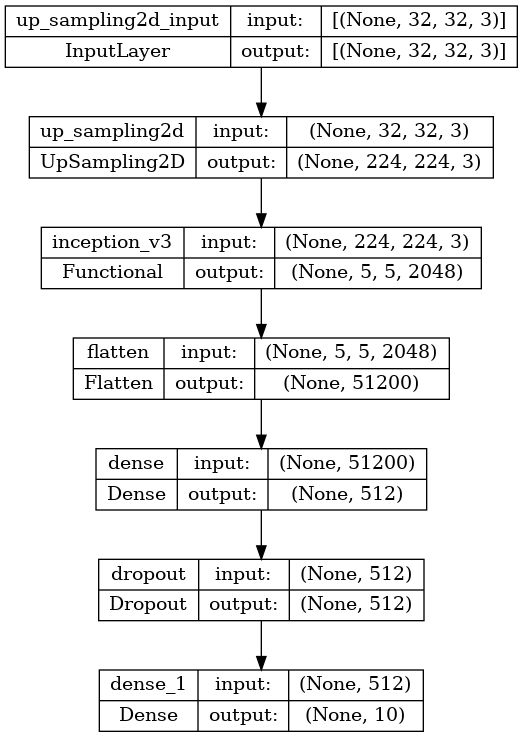

In [11]:
# Plot model architecture
tf.keras.utils.plot_model(model, show_shapes=True, to_file='GoogleNet-TL_model.png')